In [180]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",50)

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report,roc_auc_score,f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer

In [182]:
import re
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks


In [183]:
path = r"C:/Users/Krishna/Documents/kaggle/AV_HR_Hackathon"

In [184]:
train = pd.read_csv(f'{path}/input/train_jqd04QH.csv',dtype = {'enrollee_id':str})
test = pd.read_csv(f'{path}/input/test_KaymcHn.csv',dtype = {'enrollee_id':str})

f'train dimensions are : {train.shape}'
f'test dimensions are : {test.shape}'

train.head(2)
test.head(2)


'train dimensions are : (18359, 14)'

'test dimensions are : (15021, 13)'

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94


In [185]:
def data_info(df = train):
    df_info = pd.DataFrame(df.isna().sum(),columns = ['Null_count'])
    df_info['Non_Null_count'] = df_info.index.map(df.notna().sum())
    df_info['N_unique'] = df_info.index.map(df.nunique())
    df_info['D_types'] = df_info.index.map(df.dtypes)
    df_info['Blank_count'] = df_info.index.map((df=='').sum())
    return df_info

In [186]:
data_info(train)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
enrollee_id,0,18359,18359,object,0
city,0,18359,123,object,0
city_development_index,0,18359,93,float64,0
gender,4098,14261,3,object,0
relevent_experience,0,18359,2,object,0
enrolled_university,342,18017,3,object,0
education_level,457,17902,5,object,0
major_discipline,2838,15521,6,object,0
experience,59,18300,22,object,0
company_size,4779,13580,8,object,0


In [187]:
train.describe(include = 'all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,18359,18359,18359.000000,14261,18359,18017,17902,15521,18300,13580,13320,17992,18359.000000,18359.000000
unique,18359,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,29280,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,1,4358,NaN,12884,13596,13659,10769,13738,3437,3120,10051,7567,NaN,NaN
mean,NaN,NaN,0.847140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.899014,0.132088
std,NaN,NaN,0.110189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.885300,0.338595
min,NaN,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,0.796000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,NaN,NaN,0.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,NaN,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,0.000000


### checking event rate 

In [188]:
from collections import Counter
Counter(train.target)
train.target.value_counts(normalize=True) # works for numeric columns too with arguement `bins`
#train.city_development_index.value_counts(bins =6)

Counter({0: 15934, 1: 2425})

0    0.867912
1    0.132088
Name: target, dtype: float64

### treating null values

In [189]:
var = 'gender'
#f'count of NULLs in {var} : {train[[var]].isna().sum()[0]}'
train[var].value_counts(dropna = False)

Male      12884
NaN        4098
Female     1188
Other       189
Name: gender, dtype: int64

Text(0.5, 1.0, 'Count Plot of gender')

target,0,1
gender,,
Female,0.849327,0.150673
Male,0.877523,0.122477
Other,0.846561,0.153439
All,0.874763,0.125237


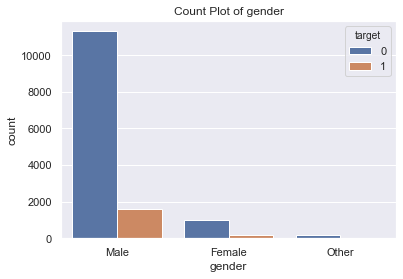

In [190]:
sns.countplot(x= var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,normalize='index',)

In [191]:
#creating a label 'missing' as the null count is very high 
train[var].fillna('missing',inplace=True)
test[var].fillna('missing',inplace=True)

In [192]:
#http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/DataPresentation/DataPresentation7.html

In [193]:
#enrolled_university  --  Type of University course enrolled if any
var = 'enrolled_university'
#f'count of NULLs in {var} : {train[[var]].isna().sum()[0]}'
train[var].value_counts(dropna = False)

no_enrollment       13659
Full time course     3187
Part time course     1171
NaN                   342
Name: enrolled_university, dtype: int64

Text(0.5, 1.0, 'Count Plot of enrolled_university')

target,0,1
enrolled_university,,
Full time course,0.809539,0.190461
Part time course,0.851409,0.148591
no_enrollment,0.883740,0.116260
All,0.868513,0.131487


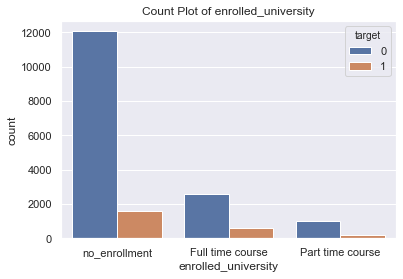

In [194]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,normalize='index',)

In [195]:
#replacing NULLs with modes
x = train[var].mode()[0]
train[var].fillna(x,inplace=True)
test[var].fillna(x,inplace=True)

In [196]:
#enrolled_university  --  Type of University course enrolled if any
var = 'education_level'
train[var].value_counts(dropna=False,normalize=True)

Graduate          0.586579
Masters           0.235252
High School       0.110681
Phd               0.025001
NaN               0.024892
Primary School    0.017594
Name: education_level, dtype: float64

Text(0.5, 1.0, 'Count Plot of education_level')

target,0,1,All
education_level,,,
Graduate,9237,1532,10769
High School,1791,241,2032
Masters,3806,513,4319
Phd,406,53,459
Primary School,298,25,323
All,15538,2364,17902


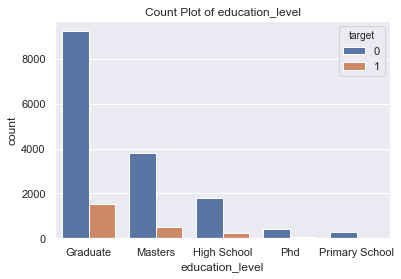

In [197]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True)#,normalize='index',)

In [198]:
#replacing NULLs with modes
train[var].fillna('missing',inplace=True)
test[var].fillna('missing',inplace=True)

In [199]:
#enrolled_university  --  Type of University course enrolled if any
var = 'major_discipline'
train[var].value_counts(dropna=False,normalize=True)

STEM               0.748298
NaN                0.154584
Humanities         0.037475
Other              0.018683
Business Degree    0.016722
Arts               0.013018
No Major           0.011221
Name: major_discipline, dtype: float64

Text(0.5, 1.0, 'Count Plot of major_discipline')

target,0,1,All
major_discipline,,,
Arts,214,25,239
Business Degree,268,39,307
Humanities,595,93,688
No Major,186,20,206
Other,306,37,343
STEM,11861,1877,13738
All,15934,2425,18359


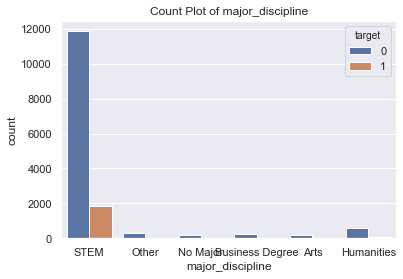

In [200]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,dropna = False)#,normalize='index',)

In [201]:
#replacing NULLs with modes
train[var].fillna('missing',inplace=True)
test[var].fillna('missing',inplace=True)

In [202]:
#enrolled_university  --  Type of University course enrolled if any
var = 'experience'
train[var].value_counts(dropna=False,normalize=True)

>20    0.187211
5      0.071300
4      0.068086
3      0.063130
6      0.061278
2      0.054033
9      0.053325
10     0.052672
7      0.051746
8      0.041124
15     0.037856
11     0.036331
14     0.032790
16     0.029904
12     0.027071
1      0.024620
<1     0.022659
13     0.022441
17     0.018901
19     0.016777
18     0.015578
20     0.007953
NaN    0.003214
Name: experience, dtype: float64

Text(0.5, 1.0, 'Count Plot of experience')

target,0,1
experience,,
1,0.761062,0.238938
10,0.875905,0.124095
11,0.875562,0.124438
12,0.895372,0.104628
13,0.883495,0.116505
14,0.875415,0.124585
15,0.889209,0.110791
16,0.896175,0.103825
17,0.902017,0.097983


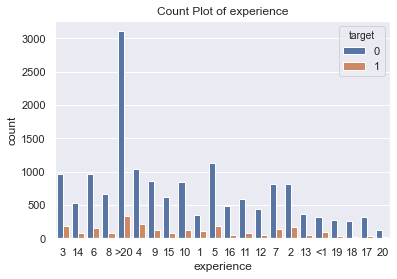

In [203]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,dropna = False,normalize='index',)

In [204]:
#replacing NULLs with modes
x = train[var].mode()[0]
train[var].fillna(train[var].mode()[0],inplace=True)
test[var].fillna(train[var].mode()[0],inplace=True)

### on similar note imputing NAs for below variables

In [205]:
x = train.last_new_job.mode()[0]
train.fillna({'company_size' : 'missing', 'company_type' : 'missing',\
              'last_new_job' : x},inplace = True)

test.fillna({'company_size' : 'missing', 'company_type' : 'missing', \
              'last_new_job' : x},inplace = True)

In [209]:
data_info(train)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
enrollee_id,0,18359,18359,object,0
city,0,18359,123,object,0
city_development_index,0,18359,93,float64,0
gender,0,18359,4,object,0
relevent_experience,0,18359,2,object,0
enrolled_university,0,18359,3,object,0
education_level,0,18359,6,object,0
major_discipline,0,18359,7,object,0
experience,0,18359,22,object,0
company_size,0,18359,9,object,0


In [208]:
train.to_csv(f'{path}/train_null_rem.csv',index= False)
test.to_csv(f'{path}/test_null_rem.csv',index= False)

<center><b> ***THE END** </center></b>

In [210]:
train['city_event_rate'] = train.city.map(train.groupby('city').target.mean())
test['city_event_rate'] = test.city.map(train.groupby('city').target.mean())

In [211]:
var = 'major_discipline'
temp = train[var].value_counts(normalize=True)
temp = pd.Series(temp[temp> 0.03].index)
#temp
train[var] = np.where(train[var].isin(temp), train[var],'low_pop')
train[var].value_counts(normalize=True)
test[var] = np.where(test[var].isin(temp), test[var],'low_pop')

STEM          0.748298
missing       0.154584
low_pop       0.059644
Humanities    0.037475
Name: major_discipline, dtype: float64

In [212]:
var = 'company_size'
temp = train[var].value_counts(normalize=True)
temp = pd.Series(temp[temp> 0.05].index)
#temp
train[var] = np.where(train[var].isin(temp), train[var],'low_pop')
train[var].value_counts(normalize=True)
test[var] = np.where(test[var].isin(temp), test[var],'low_pop')


missing      0.260308
50-99        0.169944
100-500      0.146958
10000+       0.111335
low_pop      0.081323
10/49        0.079852
1000-4999    0.076202
<10          0.074078
Name: company_size, dtype: float64

In [213]:
var = 'company_type'
temp = train[var].value_counts(normalize=True)
temp = pd.Series(temp[temp> 0.05].index)
#temp
train[var] = np.where(train[var].isin(temp), train[var],'low_pop')
train[var].value_counts(normalize=True)
test[var] = np.where(test[var].isin(temp), test[var],'low_pop')

Pvt Ltd           0.547470
missing           0.274470
low_pop           0.067269
Funded Startup    0.056539
Public Sector     0.054251
Name: company_type, dtype: float64

In [214]:
var = 'last_new_job'
temp = train[var].value_counts(normalize=True)
temp = pd.Series(temp[temp> 0.05].index)
#temp
train[var] = np.where(train[var].isin(temp), train[var],'low_pop')
train[var].value_counts(normalize=True)
test[var] = np.where(test[var].isin(temp), test[var],'low_pop')


1        0.432159
>4       0.181873
2        0.154420
never    0.119070
4        0.056539
3        0.055940
Name: last_new_job, dtype: float64

In [215]:
data_info(train)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
enrollee_id,0,18359,18359,object,0
city,0,18359,123,object,0
city_development_index,0,18359,93,float64,0
gender,0,18359,4,object,0
relevent_experience,0,18359,2,object,0
enrolled_university,0,18359,3,object,0
education_level,0,18359,6,object,0
major_discipline,0,18359,4,object,0
experience,0,18359,22,object,0
company_size,0,18359,8,object,0


In [107]:
#,normalize='index',)
#                 colnames= {0 :'Non_Event', 1:'Event'})

In [166]:
var = 'experience'
df = pd.crosstab(index = train[var], columns = train.target,margins = True).reset_index()

df.experience = pd.to_numeric(df.experience.replace({'<1': '0', '>20' : '21', 'All' : '100'}))
df = df.rename({0 :'Non_Event', 1:'Event'}, axis = 1)
df['Non_Event_%'] =  df.Non_Event/df.All
df['Event_%'] =  df.Event/df.All
df['woe'] = np.log(df['Event_%']/df['Non_Event_%'])
df['IV'] = (df['Event_%'] - df['Non_Event_%'])*df['woe']
df.sort_values('experience',inplace = True)#.reset_index(drop = True)
df.head(1)

target,experience,Non_Event,Event,All,Non_Event_%,Event_%,woe,IV
20,0,315,101,416,0.757212,0.242788,-1.137452,0.585132


In [ ]:
>= 7 [8-15] <15


In [216]:
train['experience_band'] = pd.to_numeric(train.experience.replace({'<1': '0', '>20' : '21', 'All' : '100'}))
train['experience_band'] = np.where(train.experience_band <= 7 , 'low_exp',np.where(train.experience_band >= 16, 'high_exp', 'med_exp'))

test['experience_band'] = pd.to_numeric(test.experience.replace({'<1': '0', '>20' : '21', 'All' : '100'}))
test['experience_band'] = np.where(test.experience_band <= 7 , 'low_exp',np.where(test.experience_band >= 16, 'high_exp', 'med_exp'))

In [294]:
# 5 - DIct Vectorizer on train and transforming it on test
def dict_vec(train_set,cols,is_test, test_set):
    """
    returns dict vectorizer on train set or train & test set for chosen columns
    train_set: Dataset on which DV is to be fit
    cols: List of columns of train_set which are to be considered for DV
    is_test: Boolean, If DV is to be transformed on test too
    test_set: Test set on which DV is to be transformed
    """
    from sklearn.feature_extraction import DictVectorizer
    import pandas as pd
    dvec = DictVectorizer(sparse=False)
    if not is_test:
        train_dvec = dvec.fit_transform(train_set[cols].transpose().to_dict().values())
        train_dvec = pd.DataFrame(train_dvec, index = train_set.index, columns = dvec.get_feature_names())
        train_df = pd.concat([train_set.drop(cols, axis = 1),train_dvec], axis = 1)
        return train_df,pd.DataFrame(),dvec
    else:
        train_dvec = dvec.fit_transform(train_set[cols].transpose().to_dict().values())
        train_dvec = pd.DataFrame(train_dvec, index = train_set.index, columns = dvec.get_feature_names())
        train_df = pd.concat([train_set.drop(cols, axis = 1),train_dvec], axis = 1)
        test_dvec = dvec.transform(test_set[cols].transpose().to_dict().values())
        test_dvec = pd.DataFrame(test_dvec, index = test_set.index, columns = dvec.get_feature_names())
        test_df = pd.concat([test_set.drop(cols, axis = 1),test_dvec], axis = 1)
        return train_df, test_df,dvec

In [295]:
obj_cols = train.drop(['enrollee_id','city', 'experience'],axis = 1).select_dtypes('object').columns
#obj_cols = [x for x in train.columns if x != 'enrollee_id' or x != 'city']
obj_cols

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'experience_band'],
      dtype='object')

In [296]:
df_train,df_test,dv = dict_vec(train, obj_cols,is_test = True,test_set =test)

In [297]:
df_train.shape; df_test.shape
#df_train.columns

(18359, 48)

(15021, 47)

In [299]:
fin_cols = pd.Series(df_train.columns)
#fin_cols
df_train.columns = fin_cols.apply(lambda x : re.sub('>', 'grtr',x)).apply(lambda x : re.sub('<', 'smlr',x))

In [321]:
fin_cols_test = pd.Series(df_test.columns)
#fin_cols
df_test.columns = fin_cols_test.apply(lambda x : re.sub('>', 'grtr',x)).apply(lambda x : re.sub('<', 'smlr',x))

In [335]:
df_train.to_csv(f'{path}/train_for_model.csv',index= False)
df_test.to_csv(f'{path}/test_for_model.csv',index= False)

In [302]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 69, colsample = 0.7, learning_rate = 0.05, subsample = 0.9,n_estimators =500)

In [305]:
features = df_train.drop(['enrollee_id','city','experience','target'],axis =1).columns

In [306]:
%%time
xgb.fit(df_train[features],df_train.target)

Wall time: 10.3 s


XGBClassifier(base_score=0.5, booster=None, colsample=0.7, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=69, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9, tree_method=None,
              validate_parameters=False, verbosity=None)

In [310]:

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10,shuffle = True, random_state=69)

In [312]:
all_accuracies_data = cross_val_score(estimator=xgb, X=df_train[features], y=df_train.target, cv=5,scoring = 'roc_auc')
all_accuracies_data
print("Full Accuracy: %0.2f(+/- %0.2f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))


array([0.66181879, 0.62215961, 0.62576511, 0.64694328, 0.64080449])

Full Accuracy: 0.64(+/- 0.03)


In [315]:
roc_auc_score(df_train.target, xgb.predict_proba(df_train[features])[:,1])

0.9192726051664145

In [317]:
pred_bin = xgb.predict(df_train[features])
precision_score(df_train.target,pred_bin)
recall_score(df_train.target,pred_bin)
confusion_matrix(df_train.target,pred_bin)
accuracy_score(df_train.target,pred_bin)
f1_score(df_train.target ,pred_bin)#df_train[features]

0.9468599033816425

0.16164948453608247

array([[15912,    22],
       [ 2033,   392]], dtype=int64)

0.8880657987907838

0.2761535752025361

In [318]:
# 1- getting feature importance of variables with name for XGB model
def xgb_feature_imp(model):
    """
    Gives the feature importance along with variable names for an XGB Model.
    """
    return(pd.DataFrame({'features' : model.get_booster().feature_names, 'importance' : model.feature_importances_}).\
           sort_values('importance',ascending = False))


In [320]:
feat_imp = xgb_feature_imp(model = xgb)
feat_imp


,features,importance
10,company_size=missing,0.058355
2,city_event_rate,0.035126
37,last_new_job=never,0.031371
41,major_discipline=missing,0.030019
17,education_level=High School,0.025902
26,experience_band=low_exp,0.024776
24,enrolled_university=no_enrollment,0.024698
42,relevent_experience=Has relevent experience,0.024622
15,company_type=missing,0.023967
16,education_level=Graduate,0.023893


In [332]:
df_sub = df_test[['enrollee_id']]
df_sub['target'] = xgb.predict_proba(df_test[features])[:,1]
df_sub['target'] = xgb.predict(df_test[features])

In [333]:
df_sub.head()

,enrollee_id,target
0,16548,1
1,12036,0
2,11061,1
3,5032,0
4,17599,0


In [334]:
df_sub.to_csv(f'{path}/my_submission_v1.csv',index = False)

In [ ]:
train.company_type.unique()
pd.crosstab(train.company_size, train.company_type,dropna=False)

In [ ]:
#enrolled_university  --  Type of University course enrolled if any
var = 'company_size'
train[var].value_counts(dropna=False)

In [ ]:
train[var].value_counts()

In [ ]:
cdi_bands,bins = pd.qcut(train.city_development_index, q = 6,retbins= True,duplicates = 'drop')
train['cdi_bands'] = cdi_bands
#train.groupby(cdi_bands).city.count()
train.groupby(cdi_bands).target.sum()/train.groupby(cdi_bands).target.count()
train.drop('cdi_bands', axis = 1,inplace=True)

In [ ]:
train.head()

In [ ]:
train.groupby('company_size').target.sum()/train.groupby('company_size').target.count()

In [ ]:
train.company_size

In [ ]:
sns.countplot(x = 'gender', hue = 'target', data = train,palette="Set1");

In [ ]:
def crosstab_2var(df,var1,var2):
    return(pd.crosstab([df[var1], df["target"]], df[var2], margins = True).style.background_gradient(cmap = "Accent"))

In [ ]:
crosstab_2var(train,'gender','company_size')

In [ ]:
train.columns

In [ ]:
sns.scatterplot(x = train.city_development_index, y = train.training_hours)

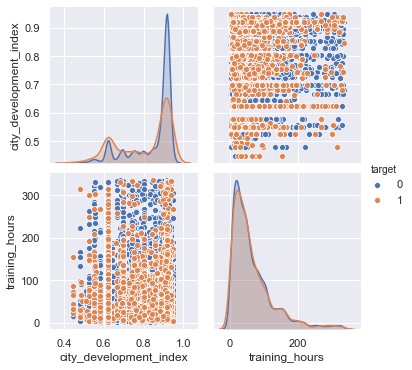

In [31]:
sns.pairplot(train.select_dtypes('number'), hue = 'target',)
